In [5]:
from bs4 import BeautifulSoup
import requests

page = 'http://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/3401.0Nov%202016'

pget = requests.get(page)
soup = BeautifulSoup(pget.content,'lxml')

In [40]:
def download_file(file,url):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter
    r = requests.get(url, stream=True)
    with open(file, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                #f.flush() commented by recommendation from J.F.Sebastian
    return local_filename

In [44]:
for link in soup.find_all('a'):
    try:
        if 'Zip' in link.find('img').get('title'):
            print(link.parent.previous.previous.strip(),link.get('href'))
            download_file(link.parent.previous.previous.strip()+'.zip','http://abs.gov.au'+link.get('href'))
    except Exception as e:
        pass

Table 1: Total Movement, Arrivals - Category of Movement /ausstats/ABS@Archive.nsf/log?openagent&340101.zip&3401.0&Time Series Spreadsheet&DF8083B80C86E1EBCA2580A7001366DB&0&Nov 2016&16.01.2017&Latest
Table 2: Total Movement, Departures - Category of Movement /ausstats/ABS@Archive.nsf/log?openagent&340102.zip&3401.0&Time Series Spreadsheet&7DB530902FCF9D12CA2580A7001366FF&0&Nov 2016&16.01.2017&Latest
Table 3: Short-term Movement, Visitor Arrivals - Selected Countries of Residence: Trend /ausstats/ABS@Archive.nsf/log?openagent&340103.zip&3401.0&Time Series Spreadsheet&2673AAB97856A5ECCA2580A700136726&0&Nov 2016&16.01.2017&Latest
Table 4: Short-term Movement, Visitor Arrivals - Selected Countries of Residence: Seasonally adjusted /ausstats/ABS@Archive.nsf/log?openagent&340104.zip&3401.0&Time Series Spreadsheet&0366F2A29DB7FB27CA2580A70013674D&0&Nov 2016&16.01.2017&Latest
Table 5: Short-term Movement, Visitor Arrivals - Selected Countries of Residence: Original /ausstats/ABS@Archive.nsf/l

In [49]:
dirt = !ls
dirt = list(dirt)

In [63]:
import pandas as pd
import zipfile

!mkdir xls    
for d in dirt:
    if 'zip' in d:
        with zipfile.ZipFile(d,"r") as zip_ref:
            try:
                zip_ref.extractall('xls')
            except:
                pass


mkdir: xls: File exists


In [71]:
df = pd.read_excel('xls/340101.xls',sheetname='Data1')
df

,Number of movements ; Permanent Settler Arrivals ;,Number of movements ; Long-term (more than one year) Residents returning ;,Number of movements ; Long-term (more than one year) Visitors arriving ;,Number of movements ; Permanent and Long-term Arrivals ;,Number of movements ; Short-term (less than one year) Residents returning ;,Number of movements ; Short-term (less than one year) Visitors arriving ;,Number of movements ; Short-term (less than one year) Visitors arriving ;.1,Number of movements ; Short-term (less than one year) Visitors arriving ;.2,Number of movements ; Total Arrivals ;
Unit,Number,Number,Number,Number,Number,Number,Number,Number,Number
Series Type,Original,Original,Original,Original,Original,Original,Seasonally Adjusted,Trend,Original
Data Type,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW,FLOW
Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month
Collection Month,1,1,1,1,1,1,1,1,1
Series Start,1976-01-01 00:00:00,1976-01-01 00:00:00,1976-01-01 00:00:00,1976-01-01 00:00:00,1976-01-01 00:00:00,1976-01-01 00:00:00,1976-01-01 00:00:00,1976-01-01 00:00:00,1976-01-01 00:00:00
Series End,2016-11-01 00:00:00,2016-11-01 00:00:00,2016-11-01 00:00:00,2016-11-01 00:00:00,2016-11-01 00:00:00,2016-11-01 00:00:00,2016-11-01 00:00:00,2016-11-01 00:00:00,2016-11-01 00:00:00
No. Obs,491,491,491,491,491,491,491,491,491
Series ID,A83808877L,A83808875J,A83808874F,A83808876K,A83808900X,A83808902C,A83808903F,A83808901A,A83808899A
1976-01-01 00:00:00,3780,5380,2750,11910,143400,47700,46500,45500,203000


Populating the interactive namespace from numpy and matplotlib


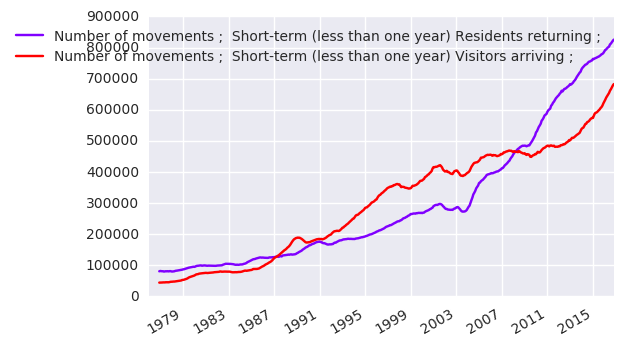

In [90]:
%pylab inline
import seaborn
df[9:].iloc[:,[4,5]].rolling(window=12).mean().plot(cmap='rainbow')

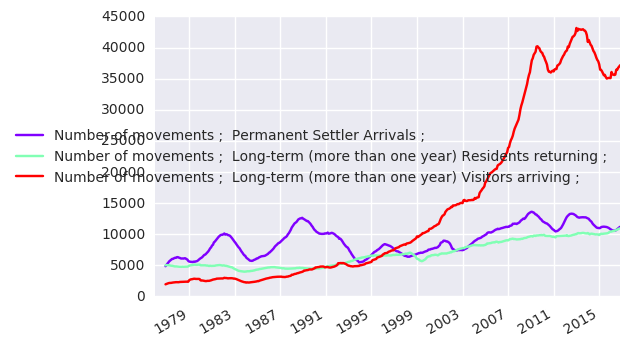

In [94]:
df[9:].iloc[:,:3].rolling(window=12).mean().plot(cmap='rainbow')

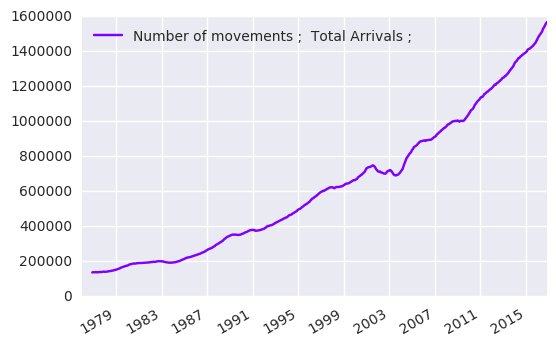

In [97]:
df[9:].iloc[:,-1:].rolling(window=12).mean().plot(cmap='rainbow')

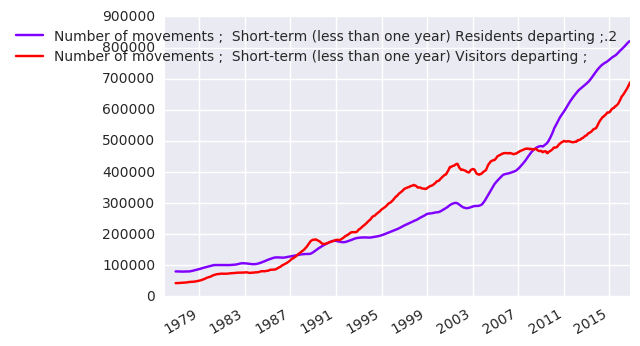

In [204]:
df = pd.read_excel('xls/340102.xls',sheetname='Data1')
df[9:].iloc[:,-3:-1].rolling(window=12).mean().plot(cmap='rainbow')

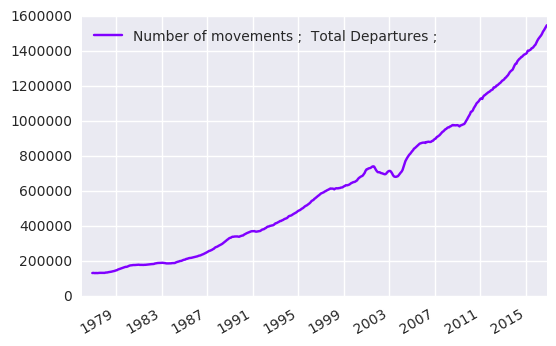

In [205]:
df[9:].iloc[:,-1:].rolling(window=12).mean().plot(cmap='rainbow')

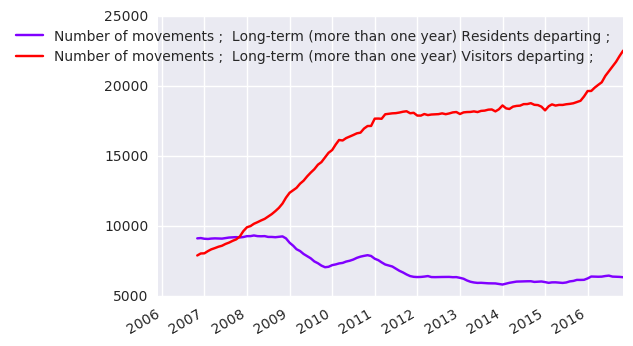

In [206]:
df[-132:].iloc[:,1:3].rolling(window=12).mean().plot(cmap='rainbow')

Visitor Arrivals
====

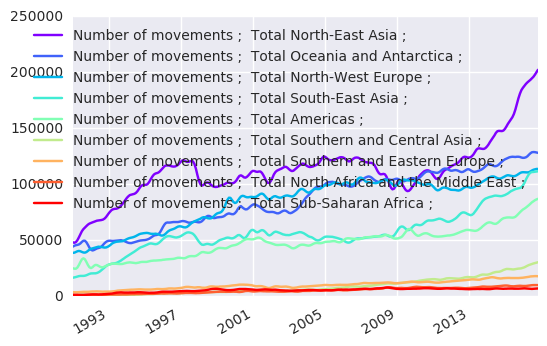

In [207]:
import datetime
df = pd.read_excel('xls/340103.xls',sheetname='Data1')
totals = df[9:].transpose()#
totals = totals[totals.index.str.contains('Total')]
totals.sort_values(datetime.datetime(2016,11,1),ascending=False)[1:].transpose().plot(cmap='rainbow')

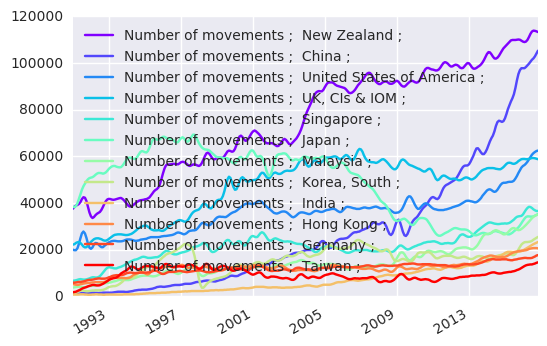

In [208]:
untotals = df[9:].transpose()#
untotals = untotals[~untotals.index.str.contains('Total')]
untotals.sort_values(datetime.datetime(2016,11,1),ascending=False)[:12].transpose().plot(cmap='rainbow')

In [209]:
import numpy as np
year = untotals.iloc[:,[-13,-1]]
year['Diff'] = year[year.columns[1]] - year[year.columns[0]]
year['DiffProp'] = year['Diff'] / year[year.columns[1]].replace(0,np.nan)
year.sort_values('DiffProp')

/Users/jacksongs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/jacksongs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,2015-11-01 00:00:00,2016-11-01 00:00:00,Diff,DiffProp
Number of movements ; Other Oceania and Antarctica ;,2700,2500,-200,-0.08
Number of movements ; Sweden ;,3800,3700,-100,-0.027027
Number of movements ; New Caledonia ;,4100,4100,0,0
Number of movements ; Other North-East Asia ;,1000,1000,0,0
Number of movements ; Timor-Leste ;,300,300,0,0
Number of movements ; Ireland ;,4700,4700,0,0
Number of movements ; South Africa ;,4700,4700,0,0
Number of movements ; Switzerland ;,4500,4500,0,0
Number of movements ; Norway ;,1800,1800,0,0
"Number of movements ; UK, CIs & IOM ;",58400,58800,400,0.00680272


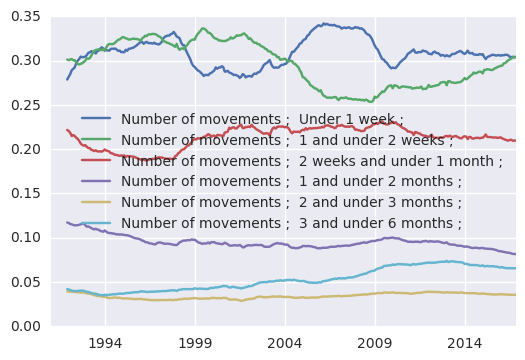

In [211]:
df = pd.read_excel('xls/340106.xls',sheetname='Data1')
df[9:].iloc[:,:6].rolling(window=12).mean().apply(lambda x: x/df[9:].iloc[:,:6].rolling(window=12).mean().sum(axis=1)).plot()#.plot(figsize=(9,5))

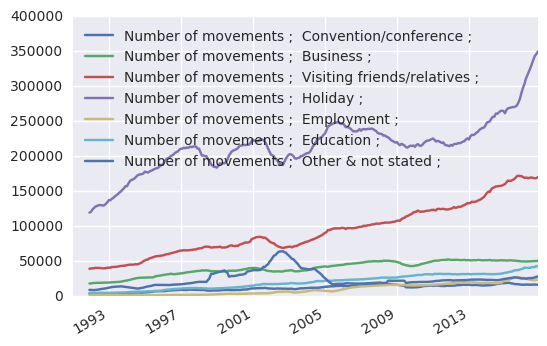

In [171]:
df[9:].iloc[:,8:-1].rolling(window=12).mean().plot()

Resident Departures
====

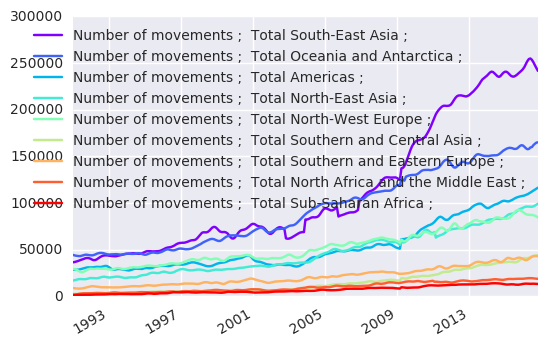

In [172]:

import datetime
df = pd.read_excel('xls/340107.xls',sheetname='Data1')
totals = df[9:].transpose()#
totals = totals[totals.index.str.contains('Total')]
totals.sort_values(datetime.datetime(2016,11,1),ascending=False)[1:].transpose().plot(cmap='rainbow')

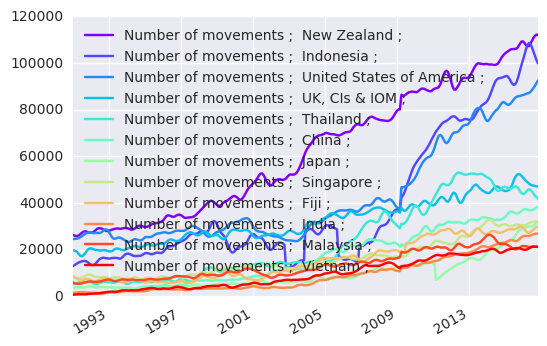

In [173]:
untotals = df[9:].transpose()#
untotals = untotals[~untotals.index.str.contains('Total')]
untotals.sort_values(datetime.datetime(2016,11,1),ascending=False)[:12].transpose().plot(cmap='rainbow')

In [202]:
import numpy as np
year = untotals.iloc[:,[-13,-1]]
year['Diff'] = year[year.columns[1]] - year[year.columns[0]]
year['DiffProp'] = year['Diff'] / year[year.columns[1]].replace(0,np.nan)
year.sort_values('DiffProp')

/Users/jacksongs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/jacksongs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,2015-11-01 00:00:00,2016-11-01 00:00:00,Diff,DiffProp
Number of movements ; Turkey ;,3700,1900,-1800,-0.947368
Number of movements ; Netherlands ;,3300,2600,-700,-0.269231
Number of movements ; Ireland ;,6900,5600,-1300,-0.232143
Number of movements ; Chile ;,1700,1400,-300,-0.214286
Number of movements ; France ;,12100,10000,-2100,-0.21
Number of movements ; French Polynesia ;,700,600,-100,-0.166667
Number of movements ; Poland ;,1500,1300,-200,-0.153846
Number of movements ; Cambodia ;,4900,4400,-500,-0.113636
"Number of movements ; UK, CIs & IOM ;",52300,47100,-5200,-0.110403
Number of movements ; Spain ;,5800,5300,-500,-0.0943396


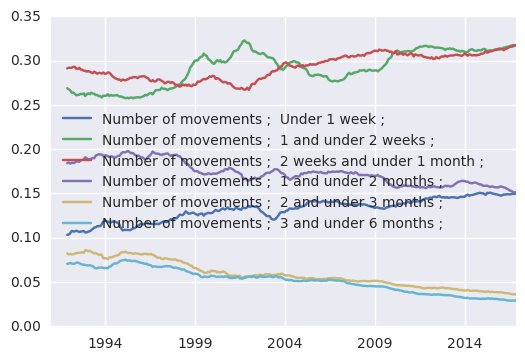

In [213]:
df = pd.read_excel('xls/3401010.xls',sheetname='Data1')
df[9:].iloc[:,:6].rolling(window=12).mean().apply(lambda x: x/df[9:].iloc[:,:6].rolling(window=12).mean().sum(axis=1)).plot()#.plot(figsize=(9,5))

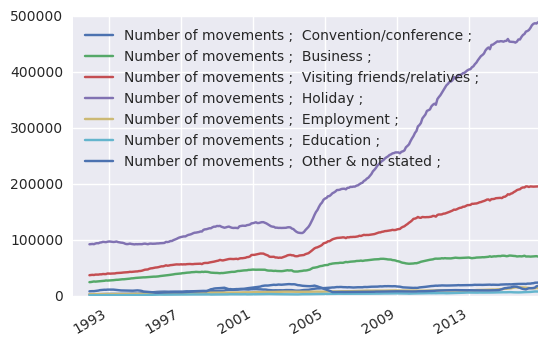

In [214]:
df[9:].iloc[:,8:-1].rolling(window=12).mean().plot()

Visitor Departures
===

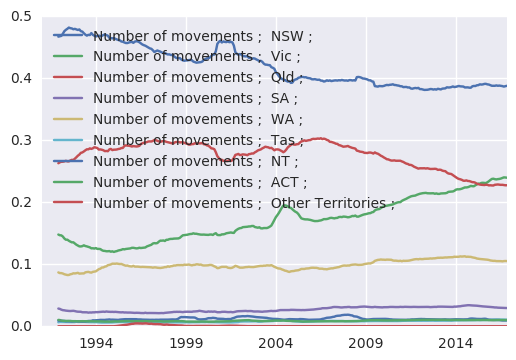

In [217]:
df = pd.read_excel('xls/3401011.xls',sheetname='Data1')
df[9:].iloc[:,:-1].rolling(window=12).mean().apply(lambda x: x/df[9:].iloc[:,:6].rolling(window=12).mean().sum(axis=1)).plot()#.plot(figsize=(9,5))

Permanent Movements
====

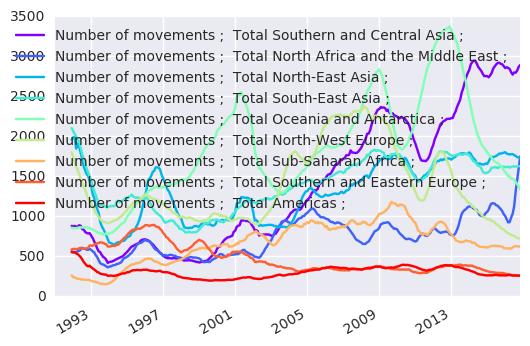

In [223]:
df = pd.read_excel('xls/3401012.xls',sheetname='Data1')
totals = df[9:].transpose()#
totals = totals[totals.index.str.contains('Total')]
totals.sort_values(datetime.datetime(2016,11,1),ascending=False)[1:].transpose().rolling(window=12).mean().plot(cmap='rainbow')

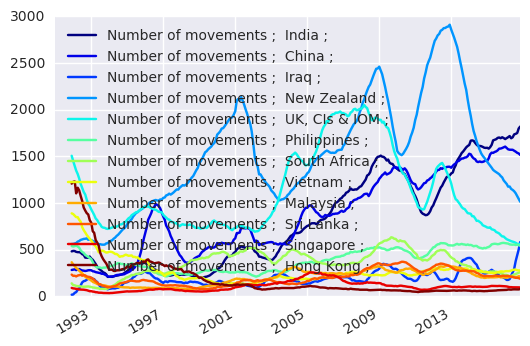

In [227]:
untotals = df[9:].transpose()#
untotals = untotals[~untotals.index.str.contains('Total')]
untotals.sort_values(datetime.datetime(2016,11,1),ascending=False)[:12].transpose().rolling(window=12).mean().plot(cmap='jet')

In [228]:
untotals.sort_values(datetime.datetime(2016,11,1),ascending=False)[:12].transpose().rolling(window=12).mean()

,Number of movements ; India ;,Number of movements ; China ;,Number of movements ; Iraq ;,Number of movements ; New Zealand ;,"Number of movements ; UK, CIs & IOM ;",Number of movements ; Philippines ;,Number of movements ; South Africa ;,Number of movements ; Vietnam ;,Number of movements ; Malaysia ;,Number of movements ; Sri Lanka ;,Number of movements ; Singapore ;,Number of movements ; Hong Kong ;
1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
